### Train model
Model is inspired by Baidu 2.
See models/model_2.png for architecture diagram. Save model on every epoch.

In [6]:
from src.train import train
from src.models import model_2
from src.char_map import char_map, index_map

model = model_2(input_dim=13,
                filters=200,
                kernel_size=11, 
                conv_stride=2,
                conv_border_mode='valid',
                units=250,
                activation='relu',
                dropout_rate=1,
                number_of_layers=5,
                output_dim=len(char_map)+1)
model_name = "model_2"
train(input_to_softmax=model, model_name=model_name, spectrogram=False, epochs=40)


Epoch 1/40
467/467 [==============================] - 3977s 9s/step - loss: 213.9328 - val_loss: 211.5153
Epoch 2/40
467/467 [==============================] - 3997s 9s/step - loss: 152.3702 - val_loss: 171.9466
Epoch 3/40
467/467 [==============================] - 4187s 9s/step - loss: 112.8359 - val_loss: 128.5050
Epoch 4/40
467/467 [==============================] - 4322s 9s/step - loss: 90.4533 - val_loss: 111.2565
Epoch 5/40
467/467 [==============================] - 4343s 9s/step - loss: 79.4654 - val_loss: 102.2652
Epoch 6/40
467/467 [==============================] - 4306s 9s/step - loss: 72.6995 - val_loss: 99.3781
Epoch 7/40
467/467 [==============================] - 4316s 9s/step - loss: 68.1316 - val_loss: 95.7072
Epoch 8/40
467/467 [==============================] - 4312s 9s/step - loss: 64.4226 - val_loss: 89.6613
Epoch 9/40
467/467 [==============================] - 4322s 9s/step - loss: 61.4300 - val_loss: 89.6670
Epoch 10/40
467/467 [==============================] - 

### Load saved model

In [1]:
from src.char_map import char_map, index_map
from src.models import model_2

model = model_2(input_dim=13,
                filters=200,
                kernel_size=11, 
                conv_stride=2,
                conv_border_mode='valid',
                units=250,
                activation='relu',
                dropout_rate=1,
                number_of_layers=5,
                output_dim=len(char_map)+1)
model_name = "model_2"
model.load_weights('models/' + model_name + '.h5')

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, None, 13)          0         
_________________________________________________________________
layer_1_conv (Conv1D)        (None, None, 200)         28800     
_________________________________________________________________
conv_batch_norm (BatchNormal (None, None, 200)         800       
_________________________________________________________________
rnn_1 (GRU)                  (None, None, 250)         338250    
_________________________________________________________________
bt_rnn_1 (BatchNormalization (None, None, 250)         1000      
_________________________________________________________________
rnn_2 (GRU)                  (None, None, 250)         375750    
_________________________________________________________________
bt_rnn_2 (BatchNormalization (None, None, 250)         1000      
__________

### Loss

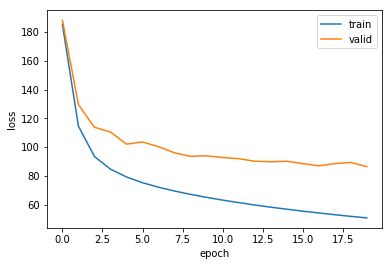

In [2]:
from src.plot import plot_hist

model_name = "model_2"
plot_hist(model_name)

### Word Error Rate - train

In [10]:
from src.predict import calculate_wer
from src.data_generat or import TRAIN_LENGTH

calculate_wer(model, model_name, 'train', TRAIN_LENGTH)

processed 10 in 1 minutes
processed 20 in 2 minutes
processed 30 in 3 minutes
processed 40 in 4 minutes
processed 50 in 5 minutes
processed 60 in 6 minutes
processed 70 in 7 minutes
processed 80 in 8 minutes
processed 90 in 9 minutes
processed 100 in 10 minutes
processed 110 in 11 minutes
processed 120 in 12 minutes
processed 130 in 13 minutes
processed 140 in 14 minutes
processed 150 in 15 minutes
processed 160 in 16 minutes
processed 170 in 17 minutes
processed 180 in 18 minutes
processed 190 in 19 minutes
processed 200 in 20 minutes
processed 210 in 21 minutes
processed 220 in 22 minutes
processed 230 in 23 minutes
processed 240 in 24 minutes
processed 250 in 25 minutes
processed 260 in 26 minutes
processed 270 in 27 minutes
processed 280 in 28 minutes
processed 290 in 29 minutes
processed 300 in 30 minutes
processed 310 in 31 minutes
processed 320 in 32 minutes
processed 330 in 33 minutes
processed 340 in 34 minutes
processed 350 in 35 minutes
processed 360 in 36 minutes
processed 

In [9]:
import numpy as np
from src.predict import load_wer

wer = load_wer(model_name, 'train')
print("WER mean=%f std=%f" % (np.std(wer), np.mean(wer)))

WER mean=7.003187 std=11.521092


### Word Error Rate - validation

In [5]:
from src.predict import calculate_wer
from src.data_generator import VALID_LENGTH

calculate_wer(model, model_name, 'validation', VALID_LENGTH)

processed 10 in 0 minutes
processed 20 in 2 minutes
processed 30 in 3 minutes
processed 40 in 4 minutes
processed 50 in 5 minutes
processed 60 in 6 minutes
processed 70 in 7 minutes
processed 80 in 12 minutes
processed 90 in 13 minutes
processed 100 in 14 minutes
processed 110 in 15 minutes
processed 120 in 16 minutes
processed 130 in 17 minutes
processed 140 in 18 minutes
processed 150 in 19 minutes
processed 160 in 20 minutes
processed 170 in 21 minutes
processed 180 in 22 minutes
processed 190 in 22 minutes
processed 200 in 23 minutes
processed 210 in 24 minutes
processed 220 in 25 minutes
processed 230 in 26 minutes
processed 240 in 27 minutes
processed 250 in 28 minutes
processed 260 in 29 minutes
processed 270 in 30 minutes
processed 280 in 31 minutes
processed 290 in 32 minutes
Total time: 33.765643 minutes


In [5]:
import numpy as np
from src.predict import load_wer

wer = load_wer(model_name, 'validation')
print("WER mean=%f std=%f" % (np.std(wer), np.mean(wer)))

WER mean=39.513170 std=96.793333


### Sample prediction - training

In [ ]:
import numpy as np
import pickle
from src.predict import predict

predict(0, 'train', model)
predict(1, 'train', model)
predict(2, 'train', model)
predict(3, 'train', model)
predict(4, 'train', model)
predict(5, 'train', model)
predict(6, 'train', model)
predict(7, 'train', model)
predict(8, 'train', model)
predict(9, 'train', model)

Truth: ያንደኛ ደረጃ ትምህርታቸው ን ጐንደር ተ ም ረዋል
Predicted: የንደኛ ደረጃትምርታቸውን ቆንዳር ተምረዋል
wer: 8


### Sample prediction - validation

In [7]:
import numpy as np
import pickle
from src.predict import predict

wer = pickle.load(open('models/' + model_name + '_validation_wer.pickle', "rb" ))
wer_index = np.argsort(wer)
predict(wer_index[0], 'validation', model)
predict(wer_index[1], 'validation', model)
predict(wer_index[2], 'validation', model)
predict(wer_index[3], 'validation', model)
predict(wer_index[4], 'validation', model)
predict(wer_index[5], 'validation', model)
predict(wer_index[-1], 'validation', model)
predict(wer_index[-2], 'validation', model)
predict(wer_index[-3], 'validation', model)
predict(wer_index[-4], 'validation', model)
predict(wer_index[-5], 'validation', model)
predict(wer_index[-6], 'validation', model)

Truth: ግን ይህ ሁሉ ውሸት ነው
Predicted: ግሚየሁሉሽት ነው
wer: 8


Truth: ይሄኔ መለስ ነቃ አለ
Predicted: ሄን የ መለት መቃ ለ
wer: 7


Truth: እሱ ም ራሱ ችግር አለ በት
Predicted: ሱም መራሶችግራ ለ በት
wer: 7


Truth: ድሮ ከ ህዝብ የሚ ሰበሰበው ግብር ነበር
Predicted: ቶሩ ከህዝ ቤሚ ሰምሰቡ ግብፍላበር
wer: 11


Truth: እነርሱ ከሌሉ ዋጋ የ ለኝም
Predicted: እነር ስምክል ወገ ለ ም
wer: 10


Truth: በ ስፖንሰር ከተገኘ ገቢ ነው እንጂ
Predicted: በ ስፖንሳር ከተገኘ ገቢነው ንቺ
wer: 4


Truth: በ ብዛት ግን በ የ መንገዱ ዳር በ የ በረንዳ ው ላይ ም ለ ማደር በ መከልከላቸው ማይ ሀብ ሀብ የተባለ የ ከተማው ቆሻሻ ማጠራቀሚያ ቦታ የሚያድሩ መሆኑን ገልጠዋል
Predicted: ስክእ ብዛት ብንበ የ መንዱዳር በ የ በረን እና ላይን ን ብለ ማደር በ መከል ካ ላቸው ማ ራ ሀ በተባለከት ማቆሻሽ መተረቀ መያበጣ የሚ ያጡ መሆኑ ን ጋልተዋል
wer: 42


Truth: ለ አላህ መገዛት ማለት እንዲ ሁ በ ቀን አ ም ስቴ ከ ፊቱ መደ ፋት ማለት አይደለም ለህ ግጋ ቶቹ ና ትእዛዛቱ ም ን ጊዜ ም ታዛዥ ሆኖ መገኘት ማለት ነው እንጂ
Predicted: ለ አላሁምንገዛት መለት የንዲሁ ወርቀና ምችቴ የ ከፍቱ መደፋት መለ ተድ ለም ለግጋቶቹ ና ተዛቱ ምንግዜ ም ታዘዩዎ ን መንገኘት ማለት መንጂ
wer: 41


Truth: ባለፈው ቅዳሜ ፕሬዝዳንት ኢሳያስ በ ተገኙ በት የ ተማረከ ውን አብራሪ ኤርትራ ለ ህዝቧ በ ማሳየት ህዝብ ለ ማስደሰት ሙከራ ማድረጓ ን የተለያዩ የ ዜና ምንጮች አሳው ቀዋል
Predicted: ባለፉቅዳ ፕሬልዳን ሰይስብ ተቅኝ በቴተማረኮን አራሪ ሌኤርትራ ለ ባስሳ የ ህስብለ ማስተሰት መክራ ማድደባ የተለያዩ የ ዝናምጮች አሳቡ ቷል
wer: 45


Truth: ፕሬዝዳንቱ በ ዚሁ ንግግራቸው ኢትዮጵያ የ ጅቡቲ የ ህይወት መስመር ብቻ ሳት ሆን የ ወደቡ ሰማኒያ ከ መቶ ብቸኛ ተጠቃሚ መሆኗ ንም ጨምረው አስረድ ተዋል
Predicted: ፕሬዚዳንቶወ ዚ ነሪንግራቸው የኢትዮጵያ ጂቤቴ ኤት ነስብቻ ሳቶን የ ወደ ቡሰማላያከ መቶ ቻኛ ፍቃባ የመሆና ለም ጨመሯ አስረድጥራዋል
wer: 43


Truth: ወደ ትውልድ መንደራቸው የሚከዱት ን ማደን ቀርቶ ለ ስምንተኛው ዙር የ ሳ ዋ ስልጠና ተ መልማይ ለ ማግኘት መቸገሩ ተ ዘግ ቧል
Predicted: ወደትው ደድ መንዳአቸው የሚ ፈድስ ንም ማደን ቀርቶ ደ ስምንተኛው ሶሆየ ሳዋስልጣና ተመዝማልለማግኘጥመቸገሩ ተልዘቅሟል
wer: 28


Truth: ይህን ጉዳይ አስመልክቶ በተ ገመገሙ በት ወቅት ከ ሰራተኞቹ ጥያቄ ቀርቦ ላቸው ሲ መልሱ ገንዘቡ እንዲ ሰጠኝ እኔ ጥያቄ አላ ቀረብኩ ም ብለዋል
Predicted: ይም ጉዳሱ መልክተ በተገመገሙ በ በቅጥ ከ ሰራት የሚቹጥያቤ ቀርጐላቸሁ ሲመልሱ ከሚዘቡ እንዲ ሰጠኝ እኔኢያቀላቀረኩ ብላል
wer: 33


33